My First Kaggale notebook

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
train_df = pd.read_csv('input/train.csv')
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Najib, Miss. Adele Kiamie ""Jane""",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [52]:
#exploratory data analysis 
profile = ProfileReport(train_df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


this panda profile as u can see above have almost all EDA metrice required. and in just one line of code, but as starter in data science i dont want to make habbit of using short cut for now. so we try to do Exploratory data analysis by our self and try to make some infrenceses from it.

In [54]:
#try create corelation of target feature with rest of the feature value.
train_df[train_df.columns[:]].corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

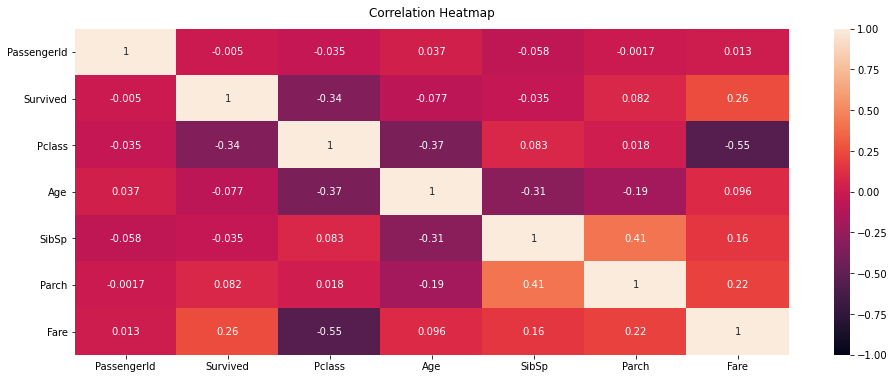

In [55]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

i thought age might be having a positive correlation with survival but it's not also unfortunately fare show some positive correlation with the target variable.

In [56]:
#check the null value per column
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

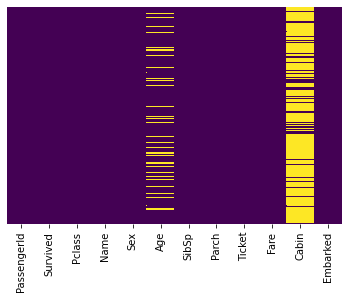

In [57]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

lot of missing value in cabin and age has some missing value cabin we will drop as there are to many missing value for age we have to figiue it out how we can fill these value by using some statistic method. Embarked also have 2 missing value.

In [58]:
#look at numeric and categorical values separately 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

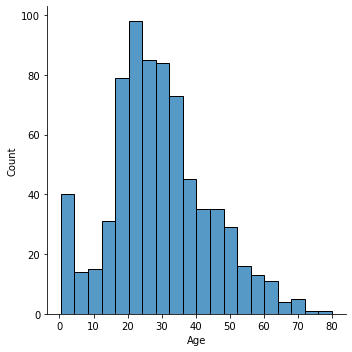

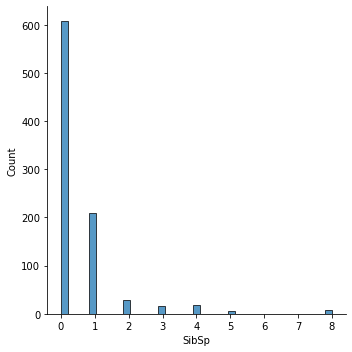

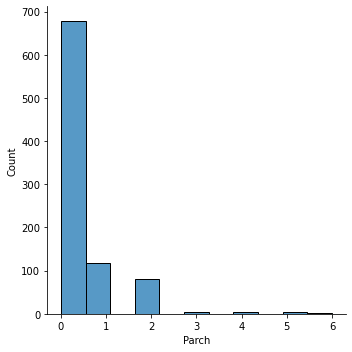

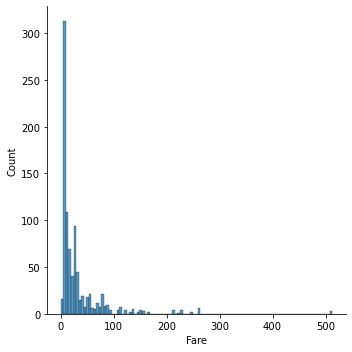

In [59]:
# here we will create histogram for numarical value.
for i in df_num:
    sns.displot(train_df[i])

looks like age follow the normal distribuation so may be we can use mean value to fill the NAN value.

In [60]:
#now we will check our dependent variable and numarical independent variable realtion using pivot table
pd.pivot_table(train_df, index ='Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


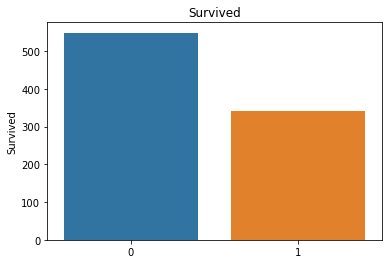

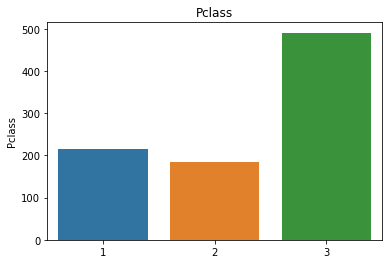

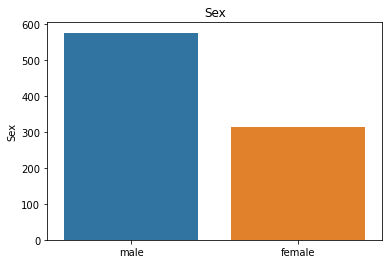

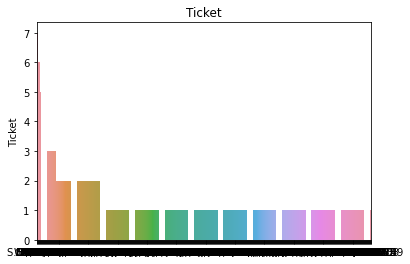

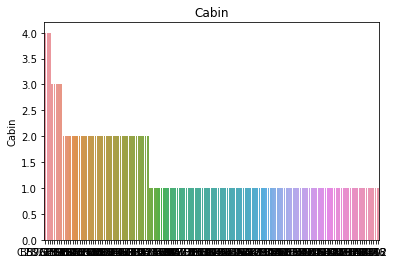

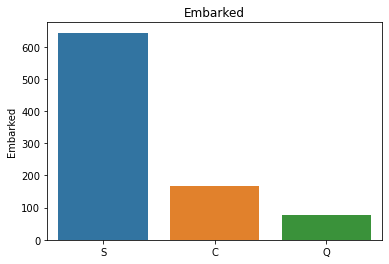

In [61]:
#here i will create a bar plot for categorical variable
for i in df_cat:
    sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts()).set_title(i)
    plt.show()

In [62]:
#creating pivot table for catgorical variable
print(pd.pivot_table(train_df, index='Survived', values='Name', aggfunc='count', columns='Pclass'))
print()
print(pd.pivot_table(train_df, index='Survived', values='Name', aggfunc='count', columns='Sex'))
print()
print(pd.pivot_table(train_df, index='Survived', values='Name', aggfunc='count', columns='Embarked'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


 Based on above exploratry data analysis Fare, Pclass, Sex these are some important feature and passengerId and cabin we have to drop because of high null value and very poor corealtion

# Feature Engineering

based on our explortary data analysis above now we will do do some feature engineering and feature selection.

In [63]:
#drop cabin from train data
train_df.drop('Cabin', axis=1, inplace=True)

In [64]:
train_df['Age'].fillna(int(train_df['Age'].mean()), inplace=True)

<AxesSubplot:>

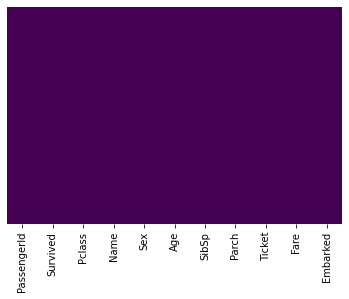

In [65]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
#there 2 NAN value in Embarked droping those 2 row
train_df.dropna(inplace=True)

In [67]:
# creating one hot encoding for catgorical value
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [68]:
#droping name and ticket because of poor corealtion and sex and emarked beacuse we create dumies for that
train_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [69]:
train_df = pd.concat([train_df,sex,embark],axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [70]:
# forgot to drop PassengerId
#train_df.drop('PassengerId', axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x, y = train_df.drop('Survived',axis=1), train_df['Survived']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

# ML Model Buliding 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [75]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [76]:
predictions = lr.predict(x_test)
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[118,  25],
       [ 20,  60]])

In [77]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7982062780269058

In [78]:
cv = cross_val_score(lr,x_train, y_train,cv=5)
cv

array([0.76119403, 0.80451128, 0.7518797 , 0.81954887, 0.78195489])

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       143
           1       0.71      0.75      0.73        80

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.80      0.80       223



In [80]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(x_train, y_train)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79104478 0.81203008 0.80451128 0.78947368 0.82706767]
0.8048254965772641


In [81]:
predictions_rf = rf.predict(x_test)
accuracy=confusion_matrix(y_test,predictions_rf)
accuracy

array([[124,  19],
       [ 18,  62]])

In [82]:
accuracy=accuracy_score(y_test,predictions_rf)
accuracy

0.8340807174887892

In [83]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       143
           1       0.77      0.78      0.77        80

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [84]:
test_sub = pd.read_csv('input/test.csv')
test_sub.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [85]:
test_sub.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

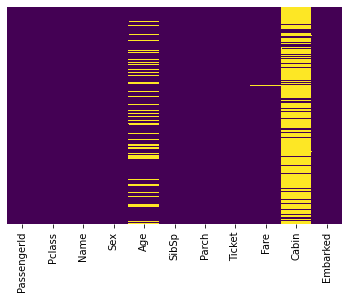

In [86]:
sns.heatmap(test_sub.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [87]:
int(test_sub['Age'].mean())

30

In [88]:
test_sub.drop('Cabin', axis=1, inplace=True)
test_sub['Age'].fillna(int(test_sub['Age'].mean()), inplace=True)

<AxesSubplot:>

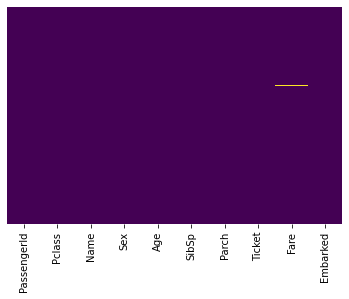

In [89]:
sns.heatmap(test_sub.isnull(),yticklabels=False,cbar=False,cmap='viridis')

still i row where is NAN i am not sure what to do with now i will try to figure it out in future as i can not drop this test value.

In [90]:
sex = pd.get_dummies(test_sub['Sex'],drop_first=True)
embark = pd.get_dummies(test_sub['Embarked'],drop_first=True)

In [91]:
test_sub.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [92]:
test_sub = pd.concat([test_sub,sex,embark],axis=1)
test_sub.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [93]:
test_sub.count()

PassengerId    418
Pclass         418
Age            418
SibSp          418
Parch          418
Fare           417
male           418
Q              418
S              418
dtype: int64

In [96]:
test_sub['Fare'].fillna(test_sub['Fare'].dropna().median(), inplace=True)
test_sub.count()

PassengerId    418
Pclass         418
Age            418
SibSp          418
Parch          418
Fare           418
male           418
Q              418
S              418
dtype: int64

In [97]:
predictions_sub = rf.predict(test_sub)

In [102]:
final = pd.DataFrame({
        "PassengerId": test_sub["PassengerId"],
        "Survived": predictions_sub
    })

In [105]:
final.to_csv('random_forest_submission.csv', index=False)